In [91]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np 
import pandas as pd
import pickle

In [92]:
df=pd.read_csv(r"C:\Users\GIRIRAJ ROY\Downloads\cStick.csv")

In [93]:
df.head(10)

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
5,27.160,1.0,102.584,64.320,88.580,1.0,1
6,57.134,0.0,70.824,73.690,93.690,0.0,0
7,66.356,0.0,84.816,78.460,98.460,0.0,0
8,60.382,0.0,75.752,75.370,95.370,0.0,0
9,23.170,1.0,99.658,56.340,86.585,1.0,1


In [94]:
df.shape

(2039, 7)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance       2039 non-null   float64
 1   Pressure       2039 non-null   float64
 2   HRV            2039 non-null   float64
 3   Sugar level    2039 non-null   float64
 4   SpO2           2039 non-null   float64
 5   Accelerometer  2039 non-null   float64
 6   Decision       2039 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 111.6 KB


In [96]:
df.duplicated().sum()

0

In [97]:
df1=df.copy()

In [98]:
df1.head()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0


In [99]:
df['Accelerometer'].unique()

array([1., 0.])

In [100]:
df['Decision '].unique()

array([1, 2, 0], dtype=int64)

In [101]:
df1

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
...,...,...,...,...,...,...,...
2034,5.655,2.0,116.310,162.242,71.310,1.0,2
2035,9.660,2.0,124.320,177.995,79.320,1.0,2
2036,15.220,1.0,93.828,40.440,82.610,1.0,1
2037,9.120,2.0,123.240,175.871,78.240,1.0,2


In [102]:
df1.drop(columns=['Sugar level','Pressure','Distance'],inplace=True)

In [149]:
df1.head(20)

,HRV,SpO2,Accelerometer,Decision
0,101.396,87.770,1.0,1
1,110.190,65.190,1.0,2
2,87.412,99.345,0.0,0
3,92.266,81.545,1.0,1
4,89.480,99.990,0.0,0
5,102.584,88.580,1.0,1
6,70.824,93.690,0.0,0
7,84.816,98.460,0.0,0
8,75.752,95.370,0.0,0
9,99.658,86.585,1.0,1


In [104]:
x=df1.drop(columns=['Decision '])

In [105]:
x

,HRV,SpO2,Accelerometer
0,101.396,87.770,1.0
1,110.190,65.190,1.0
2,87.412,99.345,0.0
3,92.266,81.545,1.0
4,89.480,99.990,0.0
...,...,...,...
2034,116.310,71.310,1.0
2035,124.320,79.320,1.0
2036,93.828,82.610,1.0
2037,123.240,78.240,1.0


In [106]:
y=df1[['Decision ']]

In [107]:
y.head()

,Decision
0,1
1,2
2,0
3,1
4,0


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [110]:
x_train.head(2)

,HRV,SpO2,Accelerometer
837,88.028,99.555,0.0
356,86.620,99.075,0.0


In [111]:
x_test.head(2)

,HRV,SpO2,Accelerometer
1107,120.0,75.0,1.0
535,68.8,93.0,0.0


In [112]:
y_train.head(2)

,Decision
837,0
356,0


In [113]:
y_test.head(2)

,Decision
1107,2
535,0


In [114]:
x_train.shape

(1631, 3)

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
x_train_scaled = scaler.transform(x_train)


x_test_scaled = scaler.transform(x_test)


In [116]:
y_train.shape

(1631, 1)

In [117]:
with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
#y_train_scaled = scaler.transform(y_train)

In [118]:
with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
y_test_scaled = scaler.fit_transform(y_test)



In [119]:
x_train_scaled.shape

(1631, 3)

In [120]:
#y_train_scaled[:10]

In [121]:
x_train_scaled

array([[0.43133272, 0.98912228, 0.        ],
       [0.40966451, 0.97711928, 0.        ],
       [0.8245614 , 0.21455364, 1.        ],
       ...,
       [0.24918436, 0.88822206, 0.        ],
       [0.80701754, 0.18604651, 1.        ],
       [0.92843952, 0.38334584, 1.        ]])

In [122]:
model=Sequential()

model.add(Dense(64,input_dim=3,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))

C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [124]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915 (11.39 KB)

 Trainable params: 2,915 (11.39 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:

history = model.fit(x_train_scaled, y_train, epochs=70)

Epoch 1/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.8269 - loss: 0.9816 
Epoch 2/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 1.0000 - loss: 0.4093
Epoch 3/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 1.0000 - loss: 0.0846
Epoch 4/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 1.0000 - loss: 0.0204
Epoch 5/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 1.0000 - loss: 0.0086
Epoch 6/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 1.0000 - loss: 0.0048
Epoch 7/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 1.0000 - loss: 0.0031
Epoch 8/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 1.0000 - loss: 0.0022
Epoch 9/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 1.0000 - loss: 0.0016
Epoch 10/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 11/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 1.0000 - loss: 9.0773e-04
Epoch 12/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/s

In [126]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 1.0000 - loss: 8.7970e-06
Test Accuracy: 1.0


In [127]:
import pickle

# Specify the filename
filename = 'mlp_model.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(model, file)



In [128]:
# Load the model from disk
with open('mlp_model.pkl', 'rb') as file:
    loaded_mlp_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_mlp_model.predict(x_test_scaled)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [129]:
predictions

array([[1.0601039e-09, 8.6210348e-06, 9.9999142e-01],
       [9.9999774e-01, 2.2314525e-06, 9.8164961e-09],
       [3.7629538e-06, 9.9998713e-01, 9.1358934e-06],
       ...,
       [1.1891169e-09, 9.9656118e-06, 9.9998999e-01],
       [3.7597554e-06, 9.9998748e-01, 8.7926273e-06],
       [6.3097816e-10, 3.6792662e-06, 9.9999630e-01]], dtype=float32)

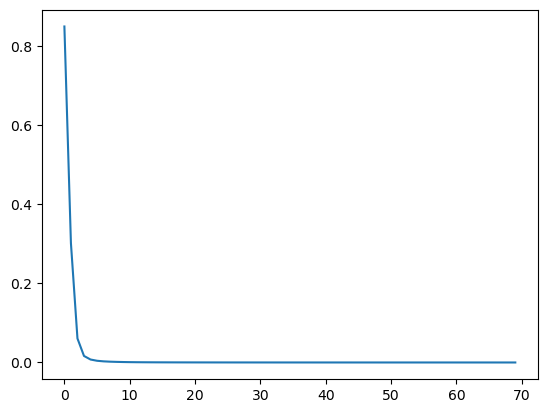

In [130]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])

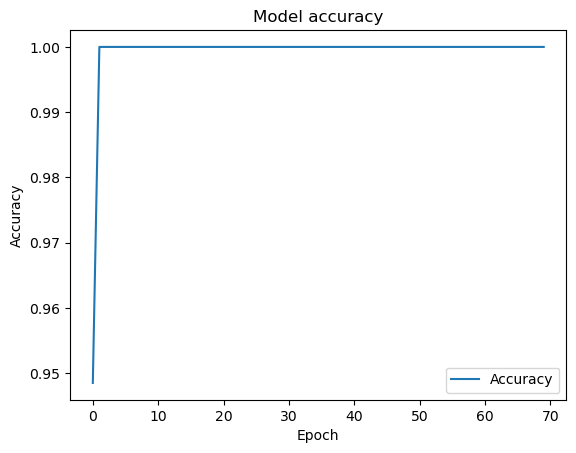

In [131]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='lower right')
plt.show()

In [132]:
y_pred=model.predict(x_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [133]:
y_train.head()

,Decision
837,0
356,0
498,2
679,2
177,1


In [134]:
y_pred[:20]

array([[1.0601039e-09, 8.6210348e-06, 9.9999142e-01],
       [9.9999774e-01, 2.2314525e-06, 9.8164961e-09],
       [3.7629538e-06, 9.9998713e-01, 9.1358934e-06],
       [3.8614253e-06, 9.9998236e-01, 1.3761018e-05],
       [9.9999797e-01, 2.0006128e-06, 2.0581847e-08],
       [6.5045663e-10, 3.2988823e-06, 9.9999666e-01],
       [9.9999809e-01, 1.9326267e-06, 1.6042463e-08],
       [8.1015805e-10, 3.4824104e-06, 9.9999654e-01],
       [4.0785944e-06, 9.9998808e-01, 7.8683424e-06],
       [9.9999797e-01, 1.9987820e-06, 2.0446116e-08],
       [9.9999797e-01, 1.9744707e-06, 1.8720014e-08],
       [4.0281675e-06, 9.9997735e-01, 1.8660836e-05],
       [3.7749894e-06, 9.9998569e-01, 1.0546890e-05],
       [3.7867649e-06, 9.9998450e-01, 1.1760440e-05],
       [9.9999809e-01, 1.9540341e-06, 1.7367887e-08],
       [2.3602418e-09, 2.2736249e-05, 9.9997723e-01],
       [9.9999809e-01, 1.9219058e-06, 1.1760985e-08],
       [3.7904317e-06, 9.9998438e-01, 1.1861089e-05],
       [8.5739321e-10, 3.575

In [135]:
y_test.head(20)

,Decision
1107,2
535,0
518,1
677,1
173,0
86,2
409,0
1087,2
1891,1
994,0


In [136]:
x_train_scaled[:10]

array([[0.43133272, 0.98912228, 0.        ],
       [0.40966451, 0.97711928, 0.        ],
       [0.8245614 , 0.21455364, 1.        ],
       [0.71745152, 0.04051013, 1.        ],
       [0.59947676, 0.6527882 , 1.        ],
       [0.01625115, 0.7591898 , 0.        ],
       [0.55512465, 0.60365091, 1.        ],
       [0.13745768, 0.82633158, 0.        ],
       [0.12526931, 0.81957989, 0.        ],
       [0.15844875, 0.83795949, 0.        ]])

In [137]:
x_train[:10]

,HRV,SpO2,Accelerometer
837,88.028,99.555,0.0
356,86.620,99.075,0.0
498,113.580,68.580,1.0
679,106.620,61.620,1.0
177,98.954,86.105,1.0
1778,61.056,90.360,0.0
1587,96.072,84.140,1.0
255,68.932,93.045,0.0
1936,68.140,92.775,0.0
2011,70.296,93.510,0.0


In [138]:
import numpy as np

def convert_to_class(y_pred):
  max_indices = np.argmax(y_pred, axis=1)
  return max_indices


In [139]:
y_true = convert_to_class(y_pred)
print(y_true)

[2 0 1 1 0 2 0 2 1 0 0 1 1 1 0 2 0 1 2 2 0 2 0 2 1 1 0 2 0 2 1 1 2 0 1 1 2
 2 2 2 0 1 2 0 2 0 1 1 1 1 0 1 2 0 0 2 0 0 1 1 1 0 1 2 0 2 0 0 0 0 0 1 0 0
 0 2 2 1 2 1 0 0 0 1 1 0 0 2 2 2 2 1 0 1 0 2 0 1 1 2 2 2 0 2 1 1 2 0 0 2 1
 2 1 2 2 1 2 1 1 2 2 2 2 1 1 2 2 2 0 1 1 2 1 0 2 0 0 1 2 1 2 0 0 0 2 0 1 2
 2 1 1 0 0 2 0 1 0 0 0 0 1 0 2 2 2 2 0 0 0 2 2 2 1 1 1 1 1 2 0 2 2 0 1 0 0
 1 1 2 1 0 2 1 1 1 0 0 1 2 1 0 2 1 2 2 1 2 2 1 2 2 2 1 0 2 2 0 0 2 1 1 1 2
 0 1 1 0 2 2 2 0 1 0 0 0 0 1 1 0 2 1 2 1 2 2 0 1 1 1 2 2 0 2 1 1 2 1 1 0 1
 1 0 0 1 1 0 2 2 0 1 0 1 0 1 1 0 1 1 0 2 2 2 1 1 2 0 2 0 1 1 0 0 1 0 0 0 2
 0 1 2 1 0 2 1 1 1 1 0 2 0 1 0 0 0 0 1 2 0 0 1 0 2 0 1 1 2 1 2 1 0 1 0 0 1
 0 2 1 1 1 0 0 0 0 1 0 2 2 1 1 2 1 0 0 1 2 2 0 2 2 0 0 2 0 2 2 0 1 1 1 0 2
 2 1 2 0 0 0 1 1 2 2 0 0 1 2 2 2 1 2 0 1 1 0 2 2 2 2 2 1 2 1 0 2 1 1 1 2 1
 2]


In [140]:
y_test[:10]

,Decision
1107,2
535,0
518,1
677,1
173,0
86,2
409,0
1087,2
1891,1
994,0


In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_true)

1.0

In [142]:
model.predict(x_train_scaled[[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[9.9999797e-01, 1.9902338e-06, 1.9824578e-08]], dtype=float32)

In [143]:
model.predict(x_train_scaled)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step


array([[9.9999797e-01, 1.9902338e-06, 1.9824578e-08],
       [9.9999797e-01, 1.9708436e-06, 1.8473990e-08],
       [6.3464511e-10, 3.4608404e-06, 9.9999654e-01],
       ...,
       [9.9999809e-01, 1.9328165e-06, 1.1607194e-08],
       [6.4628664e-10, 3.3199651e-06, 9.9999666e-01],
       [1.1493753e-09, 9.5615915e-06, 9.9999046e-01]], dtype=float32)

In [144]:
import numpy as np
with open('mlp_model.pkl', 'rb') as file:
    loaded_mlp_model = pickle.load(file)
predictions = loaded_mlp_model.predict(x_test_scaled)

def predict_fall(loaded_mlp_model, input_array):
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    input_reshaped = np.array(input_array)
    scaled_input=scaler.transform([input_reshaped]).flatten()
    input_2d=np.array([scaled_input])
    print(scaled_input)
    output=loaded_mlp_model.predict(input_2d)

    return np.argmax(output, axis=1)[0]
    #return output

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [145]:
predict_fall(loaded_mlp_model,[90.374	,80.255,	1.0])

[0.46743613 0.50650163 1.        ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1

In [146]:
#x_test_scaled

In [147]:
x_test.head(15)

,HRV,SpO2,Accelerometer
1107,120.000,75.000,1.0
535,68.800,93.000,0.0
518,100.032,86.840,1.0
677,93.432,82.340,1.0
173,88.776,99.810,0.0
86,112.170,67.170,1.0
409,83.804,98.115,0.0
1087,106.800,61.800,1.0
1891,103.266,89.045,1.0
994,88.644,99.765,0.0


In [148]:
y_test.head(3)

,Decision
1107,2
535,0
518,1
